In [1]:
import numpy as np
import pandas as pd
import random 

In [2]:
import pygad
import matplotlib.pyplot as plt

# Inicijalizacija podataka(tačaka):

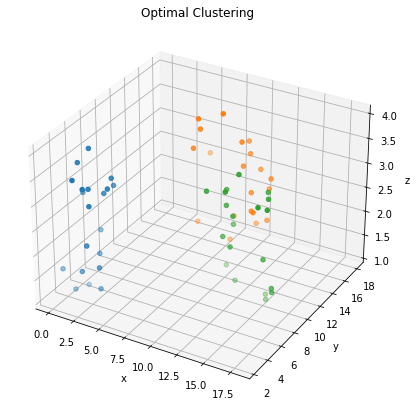

In [3]:
cluster1_num_samples = 20
cluster1_x1_start = 0
cluster1_x1_end = 5
cluster1_x2_start = 2
cluster1_x2_end = 6
cluster1_x3_start = 1
cluster1_x3_end = 4
cluster1_x1 = np.random.random(size=(cluster1_num_samples))
cluster1_x1 = cluster1_x1 * (cluster1_x1_end - cluster1_x1_start) + cluster1_x1_start
cluster1_x2 = np.random.random(size=(cluster1_num_samples))
cluster1_x2 = cluster1_x2 * (cluster1_x2_end - cluster1_x2_start) + cluster1_x2_start
cluster1_x3 = np.random.random(size=(cluster1_num_samples))
cluster1_x3 = cluster1_x3 * (cluster1_x3_end - cluster1_x3_start) + cluster1_x3_start

cluster2_num_samples = 20
cluster2_x1_start = 4
cluster2_x1_end = 12
cluster2_x2_start = 14
cluster2_x2_end = 18
cluster2_x3_start = 1
cluster2_x3_end = 4
cluster2_x1 = np.random.random(size=(cluster2_num_samples))
cluster2_x1 = cluster2_x1 * (cluster2_x1_end - cluster2_x1_start) + cluster2_x1_start
cluster2_x2 = np.random.random(size=(cluster2_num_samples))
cluster2_x2 = cluster2_x2 * (cluster2_x2_end - cluster2_x2_start) + cluster2_x2_start
cluster2_x3 = np.random.random(size=(cluster2_num_samples))
cluster2_x3 = cluster2_x3 * (cluster2_x3_end - cluster2_x3_start) + cluster2_x3_start

cluster3_num_samples = 20
cluster3_x1_start = 12
cluster3_x1_end = 18
cluster3_x2_start = 6
cluster3_x2_end = 9
cluster3_x3_start = 1
cluster3_x3_end = 4
cluster3_x1 = np.random.random(size=(cluster3_num_samples))
cluster3_x1 = cluster3_x1 * (cluster3_x1_end - cluster3_x1_start) + cluster3_x1_start
cluster3_x2 = np.random.random(size=(cluster3_num_samples))
cluster3_x2 = cluster3_x2 * (cluster3_x2_end - cluster3_x2_start) + cluster3_x2_start
cluster3_x3 = np.random.random(size=(cluster3_num_samples))
cluster3_x3 = cluster3_x3 * (cluster3_x3_end - cluster3_x3_start) + cluster3_x3_start

c1 = np.array([cluster1_x1, cluster1_x2, cluster1_x3]).T
c2 = np.array([cluster2_x1, cluster2_x2, cluster2_x3]).T
c3 = np.array([cluster3_x1, cluster3_x2, cluster3_x3]).T

# c1 = np.array([cluster1_x1, cluster1_x2]).T
# c2 = np.array([cluster2_x1, cluster2_x2]).T
# c3 = np.array([cluster3_x1, cluster3_x2]).T


data = np.concatenate((c1, c2, c3), axis=0)

#fig,ax=plt.subplots(figsize=(16,7))

#dodato
fig=plt.figure(figsize=(16,7))
ax=fig.add_subplot(111,projection='3d')
ax.set_title("Klasterovanje tacaka genetskim algoritmom(3D): ")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
#dodato_kraj 
ax.scatter(cluster1_x1, cluster1_x2, cluster1_x3)
ax.scatter(cluster2_x1, cluster2_x2, cluster2_x3)
ax.scatter(cluster3_x1, cluster3_x2, cluster3_x3)

# plt.scatter(cluster1_x1, cluster1_x2)
# plt.scatter(cluster2_x1, cluster2_x2)
# plt.scatter(cluster3_x1, cluster3_x2)

plt.title("Optimal Clustering")
plt.show()






In [4]:
points0=data.tolist()


# za cuvanje random tacaka

# with open(r'savedInput1.txt', 'w') as fp:
#     for item in points0:
#         # write each item on a new line
#         fp.write("%s\n" % item)
#     print('Done')

points0

[[0.041373103784070886, 3.4224431421945005, 1.5736490870433548],
 [3.1826995845860107, 2.5566896907781262, 2.355682119704507],
 [2.440324297305749, 2.829823787044702, 1.7528136935568195],
 [3.9645499108176336, 3.081283903962276, 1.892495899434421],
 [3.6791752380325216, 3.5793358796524464, 1.375025605048175],
 [1.970104911102487, 4.717617635440972, 3.960783401773371],
 [0.7142739421750044, 5.464928050304041, 2.925634242951598],
 [1.3844834703847975, 5.020674081723616, 1.1207556797673366],
 [1.9928743146667611, 5.986645745437505, 2.178176559009447],
 [3.8140103061524435, 5.108343524211722, 3.4358577843922244],
 [1.9681628554827961, 2.5417490793524316, 3.586839262088359],
 [1.120420582817347, 3.616197630473731, 1.1958539107380195],
 [3.2171986735576756, 4.891376486697808, 3.1241184023572655],
 [4.061719926593574, 4.2485369487653895, 3.339314788049751],
 [3.454101851103599, 5.867995842002923, 3.1804025559479214],
 [2.938362441194778, 2.5284397702708166, 3.468195523199908],
 [3.28937449721

# Reprezentacija jedinke:

In [5]:
class Individual:
    def __init__(self,points,num_clusters):
        #inicijalizujemo jedinke kao listu slucajnoodabranih tacaka duzine broja klastera:
        self.code=[points[random.randrange(len(points))] for _ in range(num_clusters)] 
        self.fitness = self.calcFitness(points,num_clusters)
        #self.centroids=self.calculateCentroids(points)
        
    def __lt__(self, other):
        return self.fitness < other.fitness
    
    
    def ed(self,a,b):
        a=np.array(a)
        b=np.array(b)
        dist=np.linalg.norm(a-b)
        
        return dist
    #odredjuje kom klasteru pripada tacka point:
    def cluster_id(self,point,centers):
        d=float('inf')
        index=-1
        best_d=float('inf')
        
        for i,c in enumerate(centers):
            new_d=self.ed(point,c)
            if new_d<best_d:
                best_d=new_d
                index=i
   
        return index
        
    def sse_partial(self,points,cluster_index):
        #s=0
        sc=0
        
        for p in points:
            if self.cluster_id(p,self.code)==cluster_index:
                sc+=(self.ed(p,self.code[cluster_index]))**2
                #if p[-1]==cluster_index:
            
        return sc
    
    #SSE(Sum squared error)-metrika koju koristimo za racunanje fitness-a
    def sse(self,points,num_clusters):
        s=0
        for k in range(num_clusters):
            s+=self.sse_partial(points,k)
        
        return s
   

    def calcFitness(self,points,num_clusters):
        
        error=self.sse(points,num_clusters)
        fitness=1/error
        
        return fitness


In [6]:
def readFile(filename):
    with open(filename, 'r') as f:
        num_points,dim=[int(x) for x in f.readline().split()]
        points=[[float(x) for x in f.readline().split()] for _ in range(num_points)]
        return points

In [7]:
# points=readFile("input2.txt")
# points=readFile("input3.txt")
# points=readFile("input_test.txt")

In [8]:
# points

In [9]:
import copy

points = copy.deepcopy(points0)
points1 = copy.deepcopy(points0)

# points=copy.deepcoppointsts)

In [10]:
num_points=len(points)
num_dimensions=len(points[0])
print(num_points,num_dimensions)

60 3


In [11]:
#Eucledian distance-Euklidsko rastojanje
def ed(a,b):
    a=np.array(a)
    b=np.array(b)
    dist=np.linalg.norm(a-b)
    return dist

In [12]:
print(ed(points[1],points[2]))

0.9945720893698958


In [13]:
def cluster_id(point,centers):
    d=float('inf')
    index=-1
    best_d=float('inf')
    for i,c in enumerate(centers):
        new_d=ed(point,c)
        if new_d<best_d:
            best_d=new_d
            index=i
            
    return index

In [14]:
def crossover(parent1,parent2,child1,child2):
    breakpoint = random.randrange(len(parent1.code))
    
    child1.code[:breakpoint] = parent1.code[:breakpoint]
    child2.code[:breakpoint] = parent2.code[:breakpoint]
    
    child1.code[breakpoint:] = parent2.code[breakpoint:]
    child2.code[breakpoint:] = parent1.code[breakpoint:]
    
    #print(breakpoint)

In [15]:
def selection(population):
    
    TOURNAMENT_SIZE = 5
    bestFitness = float('-inf')
    index = -1
    for i in range(TOURNAMENT_SIZE):
        randomIndividual = random.randrange(len(population))
        if population[randomIndividual].fitness > bestFitness:
            bestFitness = population[randomIndividual].fitness
            index = randomIndividual
    return index
    
    
    #biramo random predstavnika za svaki klaster
    #koji ce se vremenom unaprediti i tako ce napredovati ceo proces

In [16]:
def mutation(individual):
    #alfa=random vrednost kojom ce se za neki vektor pomeriti trenutni centar klastera
    #c_a =random int koji uz alfa utice na pomeraj centra
    #kao parametar/verovatnocu mutacije uzimamo 5% (MUTATION_RATE=0.05)
    MUTATION_PROB=0.05
    
    for i in range(len(individual.code)):
        l=np.array(individual.code[i])
        alpha=random.uniform(0,1)
        c_a=random.randint(0,3)
        znak=random.uniform(0,1)
        if random.random()<MUTATION_PROB:
            if znak>=0.5:
                l=l+(alpha*c_a)
                l=np.round(l,2)
                individual.code[i]=l.tolist()
            else:
                l=l - (alpha*c_a)
                l=np.round(l,2)
                individual.code[i]=l.tolist()
    

In [17]:
# points=data.tolist()

# Parametri genetskog algoritma:


In [18]:
POPULATION_SIZE = 100
NUM_GENERATIONS = 30
ELITISIM_SIZE = POPULATION_SIZE // 5
num_clusters=3

In [19]:

population = [Individual(points,num_clusters) for _ in range(POPULATION_SIZE)]
newPopulation = [Individual(points,num_clusters) for _ in range(POPULATION_SIZE)]

for i in range(NUM_GENERATIONS):
    population.sort(reverse=True)
    newPopulation[:ELITISIM_SIZE] = population[:ELITISIM_SIZE]
    
    for j in range(ELITISIM_SIZE, POPULATION_SIZE, 2):
        
        parent1Index = selection(population)
        parent2Index = selection(population)
        
        crossover(population[parent1Index], population[parent2Index], newPopulation[j], newPopulation[j+1])
        
        #print(j)
        #print(population[parent1Index].code)
        #print(population[parent2Index].code)
        mutation(newPopulation[j])
        mutation(newPopulation[j+1])
        
        newPopulation[j].fitness = newPopulation[j].calcFitness(points,num_clusters)
        newPopulation[j+1].fitness = newPopulation[j+1].calcFitness(points,num_clusters)
        
#         print(j)
#         print(newPopulation[j].code)
#         print(newPopulation[j+1].code)
#         print()
#         print()
        
    population = newPopulation

    
bestIndividual = max(population)
print(f'solution: {bestIndividual.code}, fitness: {bestIndividual.fitness}')

solution: [[14.44, 7.16, 3.43], [2.69, 4.68, 1.83], [8.2, 16.67, 2.02]], fitness: 0.0028466232982205055


In [20]:
cluster_centers=copy.deepcopy(bestIndividual.code)

In [21]:
#Svakoj tacki skupa Points dodajemo kao poslednji element redni broj klastera kome bi trebalo da odgovaraju
def assign_center(points,centers):
    best_d=float("inf")
    ind=-1
    n=len(points[0])
    
    for p in points:
        best_d=float('inf')
        for j,c in enumerate(centers):
            if(len(p)==n and len(c)==n):
                d_new=ed(p,c)
            
                if d_new<best_d:
                    ind=j
                    best_d=d_new    
                    
        p.append(ind)
        

In [22]:
print(points[0],points[-1])


[0.041373103784070886, 3.4224431421945005, 1.5736490870433548] [17.238914607928475, 6.820903873371897, 3.406334732764426]


In [23]:
assign_center(points,cluster_centers)
# points

In [24]:
print(points[0],points[-1])


[0.041373103784070886, 3.4224431421945005, 1.5736490870433548, 1] [17.238914607928475, 6.820903873371897, 3.406334732764426, 0]


In [25]:
#pravimo matricu u kojoj svaki red predstavlja listu tacaka za svaki klaster redom
def create_cluster_arrays(points,centers):
    a=[]
    b=[]
    c=[]
    M=[]
    num_clusters=len(centers)
    for p in points:
        if p[-1]==0:
            a.append(p)
    
    #a=np.array(a)
    
    for p in points:
        if p[-1]==1:
            b.append(p)
    
    #b=np.array(a)
#     M=np.vstack((a,b))
    M.append(a)
    M.append(b)
    
    for i in range(2,num_clusters): 
        c.clear()
        for p in points:
            if p[-1]==i and i!=0 and i!=1:
                c.append(p)
#         c=np.array(c)        
        M.append(c)
    
    return M

In [26]:
M=create_cluster_arrays(points,cluster_centers)
#M

In [27]:
points=sorted(points,key=lambda x: x[-1])

In [28]:
from operator import itemgetter
from itertools import groupby

In [29]:
M=[list(j) for i,j in groupby(points,key=itemgetter(num_dimensions))]
M

[[[16.848719462799075, 6.953518505403096, 2.3882694400725435, 0],
  [13.841548967907265, 6.130908031772554, 3.6394626186712102, 0],
  [16.029301589419784, 8.884272836339399, 3.430957194281714, 0],
  [13.210408674924944, 8.307907120012192, 2.697311081842619, 0],
  [13.696581218090275, 7.85094406184121, 1.6468118387178716, 0],
  [12.36029993285431, 8.623987029448603, 1.7780127241504322, 0],
  [16.442989320317817, 8.112185406669557, 1.3997267177281125, 0],
  [14.10784417299578, 6.831622171161204, 3.095990425666074, 0],
  [12.83223093872365, 7.874535567749042, 3.4174739887092027, 0],
  [13.258071939448156, 7.198153613119146, 3.2138582630749983, 0],
  [17.893011973535298, 6.631543262334414, 1.8389238855491088, 0],
  [14.359762722346877, 7.244557099230341, 3.8756559839389224, 0],
  [16.749877175024526, 7.770369360086816, 3.475771882541248, 0],
  [14.01206759831824, 6.608658736024767, 2.5069397633908053, 0],
  [16.803867186464128, 6.170251725054786, 3.5100015896685663, 0],
  [13.1891617806685

# K-Means algoritam za skup points:

In [30]:
#######################################################################
#k means

X = pd.DataFrame(points1)
X[1][0]

3.4224431421945005

In [31]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters=num_clusters, init='k-means++')

In [33]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [34]:
kmeans.cluster_centers_

array([[14.9457979 ,  7.31198869,  2.74216083],
       [ 2.50567735,  4.03115619,  2.62733145],
       [ 8.60851016, 16.04879732,  2.43949638]])

In [35]:
kmeans.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [36]:
# uporedjeni centri dva algoritma
# dodata promenljiva ispod
print("Centri genetskog algoritma: ")
print(cluster_centers)
print()
print("Centri algoritma k sredina: ")
print(kmeans.cluster_centers_)

Centri genetskog algoritma: 
[[14.44, 7.16, 3.43], [2.69, 4.68, 1.83], [8.2, 16.67, 2.02]]

Centri algoritma k sredina: 
[[14.9457979   7.31198869  2.74216083]
 [ 2.50567735  4.03115619  2.62733145]
 [ 8.60851016 16.04879732  2.43949638]]


In [37]:
k_means_centers=[]
for i in kmeans.cluster_centers_:
    k_means_centers.append(list(i))
    
k_means_centers

[[14.945797898023908, 7.311988689344471, 2.7421608322824698],
 [2.5056773491898907, 4.031156191190753, 2.627331447866477],
 [8.608510160152134, 16.04879732134381, 2.4394963761000765]]

In [38]:
k_individual=Individual(points1,num_clusters)

In [39]:
k_individual.code=k_means_centers
k_means_fitness=k_individual.calcFitness(points1,num_clusters)
print("K_means_fitness:")
print(k_means_fitness)

K_means_fitness:
0.0033348552468159365


# ISCRTAVANJE DOBIJENIH KLASTERA I NJIHOVIH CENTARA:

In [40]:
import matplotlib.pyplot as plt

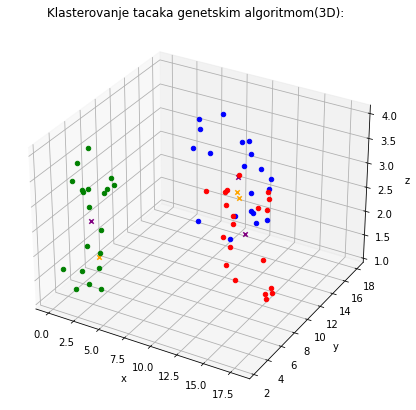

In [41]:
if num_dimensions==2:
    fig,ax=plt.subplots(figsize=(16,7))
    ax.set_title("Klasterovanje tacaka genetskim algoritmom(2D): ")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    colors=["red","green","black","yellow","blue"]
    for i in range(num_clusters):
        for j in range(len(M[i])):
            plt.scatter(((M[i])[j])[0],((M[i])[j])[1],c=colors[i])

    for j in range(num_clusters):
        plt.scatter((cluster_centers[j])[0],(cluster_centers[j])[1],c="orange",marker="x")
        
    
    for j in range(num_clusters):
        plt.scatter((k_means_centers[j])[0],(k_means_centers[j])[1],c="purple",marker="x")
        
elif num_dimensions==3:
    fig=plt.figure(figsize=(16,7))
    ax=fig.add_subplot(111,projection='3d')
    ax.set_title("Klasterovanje tacaka genetskim algoritmom(3D): ")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    colors=["red","green","blue","yellow","black"]
    for i in range(num_clusters):
        for j in range(len(M[i])):
            ax.scatter(((M[i])[j])[0],((M[i])[j])[1],((M[i])[j])[2],c=colors[i])

    for j in range(num_clusters):
        ax.scatter((cluster_centers[j])[0],(cluster_centers[j])[1],(cluster_centers[j])[2],c="orange",marker="x")
        
    
    for j in range(num_clusters):
        ax.scatter((k_means_centers[j])[0],(k_means_centers[j])[1],(k_means_centers[j])[2],c="purple",marker="x")